# Pacotes

In [1]:
import pandas as pd
import os
import timeit
import numpy as np
import random
import time
import seaborn as sns

# Diretório

In [2]:
# # diretorio PC pessoal
# diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\apply-if\dados'
# diretorio = diretorio.replace('\\','//')

# os.chdir(diretorio)
# os.getcwd()


# diretorio PC trampo
diretorio = r'C:\Users\JoãoPinheiro\OneDrive - CTI Global\Área de Trabalho\apply-if\dados'
diretorio = diretorio.replace('\\','//')

os.chdir(diretorio)
os.getcwd()


'C:\\Users\\JoãoPinheiro\\OneDrive - CTI Global\\Área de Trabalho\\apply-if\\dados'

# Download dos dados
Recomendado resetar a base.

In [3]:
#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

# Condições

In [4]:
condicao1 = ((MORADOR['RENDA_DISP_PC'] + MORADOR['PESO_FINAL']>1000) &\
    (MORADOR['RENDA_MONET_PC'] > 300) &\
    (MORADOR['RENDA_NAO_MONET_PC'] < 200) &\
    (MORADOR['RENDA_TOTAL'] < 1000))

condicao2 = ((MORADOR['RENDA_TOTAL'] * 5 > 500) &\
        (MORADOR['RENDA_MONET_PC'] > MORADOR['RENDA_TOTAL'] / 2))

condicao3 = [~( condicao1| condicao2)]



# Função

In [5]:
def funcao(z):
    if (z['RENDA_DISP_PC'] + z['PESO_FINAL'])>1000 and\
        (z['RENDA_MONET_PC']> 300) and\
        (z['RENDA_NAO_MONET_PC']< 200) and\
        z['RENDA_TOTAL']<1000:
        return 1
    
    elif z['RENDA_TOTAL']* 5 > 500 and\
        (z['RENDA_MONET_PC'] > z['RENDA_TOTAL']/2):
        return 0
    
    else:    
        return 0

# Lista de tempos

In [6]:
tempo = []

# For

In [7]:
inicio = time.time()
for i in range(len(MORADOR)):
    if( MORADOR.loc[i,'RENDA_DISP_PC'] + MORADOR.loc[i,'PESO_FINAL']>1000) and\
        (MORADOR.loc[i,'RENDA_MONET_PC']>300) and\
        (MORADOR.loc[i,'RENDA_NAO_MONET_PC']<200) and\
        (MORADOR.loc[i,'RENDA_TOTAL']<1000):
        MORADOR.loc[i,'var_teste'] = 1
    
    elif MORADOR.loc[i,'RENDA_TOTAL']*5 >500 and\
        MORADOR.loc[i,'RENDA_MONET_PC'] > MORADOR.loc[i,'RENDA_TOTAL']/2:
        MORADOR.loc[i,'var_teste'] = 1
    
    else:
        MORADOR.loc[i,'var_teste'] = 0      
final = time.time()

delta_for = final-inicio
tempo.append(delta_for)
MORADOR['var_teste'].value_counts()

var_teste
0.0    170714
1.0      7717
Name: count, dtype: int64

# Apply

In [8]:
inicio = time.time()
def funcao(z):
    if (z['RENDA_DISP_PC'] + z['PESO_FINAL']>1000) and\
        (z['RENDA_MONET_PC']> 300) and\
        (z['RENDA_NAO_MONET_PC']< 200) and\
        z['RENDA_TOTAL']<1000:
        return 1
    
    elif z['RENDA_TOTAL']* 5 > 500 and\
        (z['RENDA_MONET_PC'] > z['RENDA_TOTAL']/2):
        return 1
    
    else:    
        return 0
MORADOR['var_teste'] = MORADOR.apply(funcao, axis = 1)

final = time.time()

delta_apply = final-inicio
tempo.append(delta_apply)
MORADOR['var_teste'].value_counts()

var_teste
0    170714
1      7717
Name: count, dtype: int64

# Vetorização pandas

In [9]:
inicio = time.time()
MORADOR.loc[(condicao1 | condicao2), 'var_teste']=1
MORADOR.loc[~ (condicao1 | condicao2), 'var_teste']=0
final = time.time()

delta_vetor_pandas = final-inicio
tempo.append(delta_vetor_pandas)
MORADOR['var_teste'].value_counts()


var_teste
0    170714
1      7717
Name: count, dtype: int64

# Teste da vetorização com numpy
Não preciso por na definição da função a[0]>b[0] and b[0]>c[0]/5, pq np.vectorize já chama a a função 'teste' percorrendo cada elemento individualmente.

In [10]:
tabela = pd.DataFrame({'data1':np.random.randint(5,10,3),
                    'data2':np.random.randint(5,10,3),
                    'data3':np.random.randint(8,100,3)
})

def teste(a,b,c):
    if a > b and b > c/5:
        return 'teste1'
    else:
        return 'teste2'

funcao = np.vectorize(teste)
tabela['resultado'] = funcao(tabela['data1'], tabela['data2'], tabela['data3'])
print(tabela)


   data1  data2  data3 resultado
0      9      5     38    teste2
1      8      5     49    teste2
2      7      5     11    teste1


# Função para Vetorização numpy

In [11]:
def function1(a, b, c, d, e):
    if a + b > 1000 and c > 300 and d < 200 and e < 1000:
        return 1
    elif e * 5 > 500 and c > e / 2:
        return 1
    else:
        return 0

function_vetorizada = np.vectorize(function1)


# Vetorização numpy

In [12]:
inicio = time.time()
MORADOR['var_teste'] = function_vetorizada(MORADOR['RENDA_DISP_PC'],
                                MORADOR['PESO_FINAL'],
                                MORADOR['RENDA_MONET_PC'],
                                MORADOR['RENDA_NAO_MONET_PC'],
                                MORADOR['RENDA_TOTAL'])
final = time.time()

delta_vetor_numpy = final-inicio
tempo.append(delta_vetor_numpy)
MORADOR['var_teste'].value_counts()


c:\Users\JoãoPinheiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in function1 (vectorized)
  outputs = ufunc(*inputs)


var_teste
0    170714
1      7717
Name: count, dtype: int64

# np.select

In [13]:
inicio = time.time()
MORADOR['var_teste'] = np.select([(condicao1 | condicao2)], [1], default = 0)
final = time.time()

delta_select = final-inicio
tempo.append(delta_select)
MORADOR['var_teste'].value_counts()

var_teste
0    170714
1      7717
Name: count, dtype: int64

# np.where

In [14]:
inicio = time.time()
MORADOR['var_teste'] = np.where(condicao1 | condicao2, 1, 0)
# MORADOR['var_teste'] = np.where(condicao1, True , np.where(condicao2, False, 0))
final = time.time()

delta_where = final-inicio
tempo.append(delta_where)
MORADOR['var_teste'].value_counts()

var_teste
0    170714
1      7717
Name: count, dtype: int64

# Tabela resumo dos tempos

In [15]:
tabela_tempo = pd.DataFrame({'tempo (segundos)':tempo}, index =['for', 'apply', 'vetor pandas','vetor numpy', 'np.select','np.where'])
tabela_tempo

,tempo (segundos)
for,172.826414
apply,17.275596
vetor pandas,0.018045
vetor numpy,0.536732
np.select,0.009712
np.where,0.005551


# Gráfico

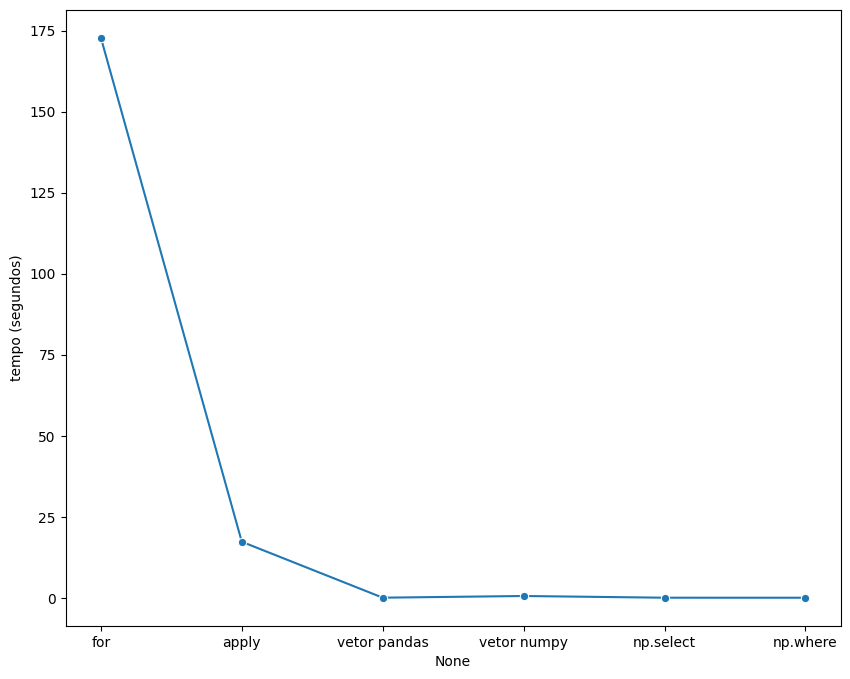

In [16]:
grafico_tempo = sns.lineplot(data = tabela_tempo,
            x=tabela_tempo.index,
            y='tempo (segundos)',
            marker='o')

grafico_tempo.figure.set_size_inches(10,8)

